In [2]:
!git clone https://github.com/Ayxux/NLP_Minor_Project


Cloning into 'NLP_Minor_Project'...
remote: Enumerating objects: 169, done.
remote: Counting objects: 100% (169/169), done.
remote: Compressing objects: 100% (154/154), done.
remote: Total 169 (delta 63), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (169/169), 4.77 MiB | 5.74 MiB/s, done.
Resolving deltas: 100% (63/63), done.


In [3]:
%cd /content/NLP_Minor_Project/

!pip install -r REQUIREMENTS.txt


/content/NLP_Minor_Project
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 5.2 MB/s eta 0:00:00
ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement wordcloud==1.8.2 (from versions: 1.0.0, 1.1.0, 1.1.1, 1.1.2, 1.1.3, 1.2, 1.2.1, 1.3, 1.3.1, 1.4, 1.4.1, 1.5.0, 1.6.0, 1.7.0, 1.8.0, 1.8.1, 1.8.2.2, 1.9.1.1, 1.9.2, 1.9.3, 1.9.4)
ERROR: No matching distribution found for wordcloud==1.8.2


In [4]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [5]:
import os
path = "/content/drive/MyDrive/data/extracted_files"
os.listdir(path)


['test.ft.txt.bz2', 'train.ft.txt.bz2']

In [6]:
import numpy as np
import bz2
def get_labels_and_texts(file, limit=50000):
    labels, texts = [], []
    for i, line in enumerate(bz2.BZ2File(file)):
        if i >= limit:
            break
        x = line.decode("utf-8")
        labels.append(1 if int(x[9]) == 2 else 0)
        texts.append(x[10:].strip())
    return np.array(labels, dtype=np.int8), texts  # ✅ np.int8 saves memory

In [7]:
import pandas as pd
import bz2
# Function to load Amazon dataset from .bz2 file (LIMITED SIZE)
def load_bz2_to_dataframe(file_path, num_lines=50000):
    data = []
    with bz2.open(file_path, "rt", encoding="utf-8") as file:
        for i, line in enumerate(file):
            if i >= num_lines:
                break
            label, text = line.split(" ", 1)
            label = label.replace("__label__", "").strip()
            data.append((label, text.strip()))
    return pd.DataFrame(data, columns=["label", "text"])

In [8]:
# Load datasets
train_path = "/content/drive/MyDrive/data/extracted_files/train.ft.txt.bz2"
test_path = "/content/drive/MyDrive/data/extracted_files/test.ft.txt.bz2"
df_train = load_bz2_to_dataframe(train_path, num_lines=50000)
df_test = load_bz2_to_dataframe(test_path, num_lines=10000)

In [9]:
df_train.head()

label                                               text
0     2  Stuning even for the non-gamer: This sound tra...
1     2  The best soundtrack ever to anything.: I'm rea...
2     2  Amazing!: This soundtrack is my favorite music...
3     2  Excellent Soundtrack: I truly like this soundt...
4     2  Remember, Pull Your Jaw Off The Floor After He...

In [10]:

# Convert labels to numeric format
df_train["label"] = df_train["label"].map({"1": 0, "2": 1})  # "1" → Negative (0), "2" → Positive (1)
df_test["label"] = df_test["label"].map({"1": 0, "2": 1})


# Remove NaN values
df_train.dropna(subset=["label"], inplace=True)
df_test.dropna(subset=["label"], inplace=True)

df_train["text"].fillna("", inplace=True)
df_test["text"].fillna("", inplace=True)

if df_train["label"].nunique() < 2:
    raise ValueError("Training data contains only one class! Check dataset.")

<ipython-input-10-7092306539fc>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train["text"].fillna("", inplace=True)
<ipython-input-10-7092306539fc>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

Original labels in training data:
label
1    25506
0    24494
Name: count, dtype: int64

Sample of raw labels:
0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

Unique values in labels:
[1 0]

After fix - Training labels:
label
0    50000
Name: count, dtype: int64

After fix - Test labels:
label
0    10000
Name: count, dtype: int64

NaN values in training labels: 0
NaN values in test labels: 0
   label                                               text
0      0  Stuning even for the non-gamer: This sound tra...
1      0  The best soundtrack ever to anything.: I'm rea...
2      0  Amazing!: This soundtrack is my favorite music...
3      0  Excellent Soundtrack: I truly like this soundt...
4      0  Remember, Pull Your Jaw Off The Floor After He...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   50000 non-null  int64 
 1   text    50

<ipython-input-11-3b7ccc608676>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train["text"].fillna("", inplace=True)
<ipython-input-11-3b7ccc608676>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

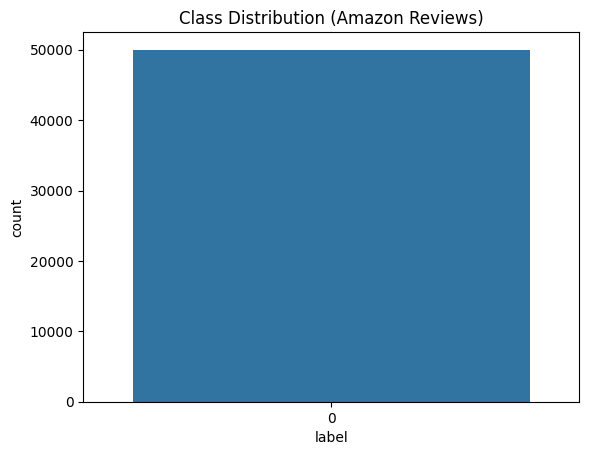

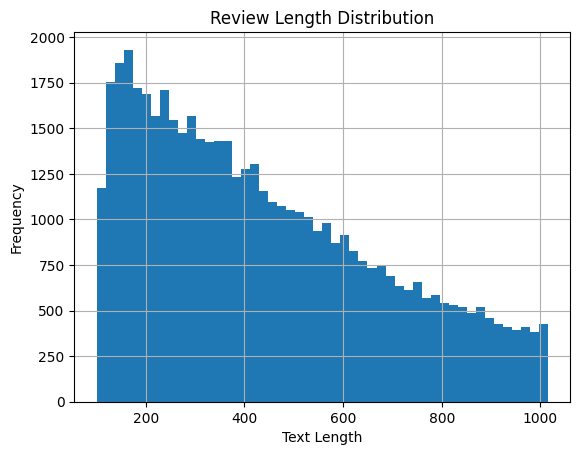

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
# ✅ Check original labels
print("Original labels in training data:")
print(df_train["label"].value_counts())

print("\nSample of raw labels:")
print(df_train["label"].head())

# ✅ Check for any unexpected label values
print("\nUnique values in labels:")
print(df_train["label"].unique())

# ✅ Fix label mapping
df_train["label"] = df_train["label"].apply(lambda x: 1 if "positive" in str(x).lower() else 0)
df_test["label"] = df_test["label"].apply(lambda x: 1 if "positive" in str(x).lower() else 0)

# ✅ Verify label distribution after fixing
print("\nAfter fix - Training labels:")
print(df_train["label"].value_counts())
print("\nAfter fix - Test labels:")
print(df_test["label"].value_counts())

# ✅ Handle missing values
df_train["text"].fillna("", inplace=True)
df_test["text"].fillna("", inplace=True)

# ✅ Verify no NaN values
print("\nNaN values in training labels:", df_train["label"].isna().sum())
print("NaN values in test labels:", df_test["label"].isna().sum())

# ✅ Display dataset information
print(df_train.head())
print(df_train.info())
print(df_train.isnull().sum())

# ✅ Check class distribution
sns.countplot(x=df_train["label"])
plt.title("Class Distribution (Amazon Reviews)")
plt.show()

# ✅ Text Length Distribution
df_train["text_length"] = df_train["text"].astype(str).apply(len)
df_train["text_length"].hist(bins=50)
plt.title("Review Length Distribution")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

In [12]:
import spacy
nlp = spacy.load("en_core_web_sm")
def preprocess_texts(texts):
    processed_texts = []
    for doc in nlp.pipe(texts, disable=["ner", "parser"]):  # ✅ Disables unnecessary components (saves RAM)
        tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]
        processed_texts.append(" ".join(tokens))
    return processed_texts


In [13]:
train_labels, train_texts = get_labels_and_texts('/content/drive/MyDrive/data/extracted_files/train.ft.txt.bz2', limit=50000)
test_labels, test_texts = get_labels_and_texts('/content/drive/MyDrive/data/extracted_files/test.ft.txt.bz2', limit=10000)

In [14]:
train_texts = preprocess_texts(train_texts)
test_texts = preprocess_texts(test_texts)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000, dtype=np.float32)  # ✅ max_features to save RAM
X = vectorizer.fit_transform(train_texts)
X_test = vectorizer.transform(test_texts)

In [16]:



from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(
    X, train_labels, train_size = 0.75
)

      # Train and evaluate Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_val)
lr_accuracy = accuracy_score(y_val, y_pred_lr)
lr_precision = precision_score(y_val, y_pred_lr)
lr_recall = recall_score(y_val, y_pred_lr)
lr_f1 = f1_score(y_val, y_pred_lr)

print(f"Logistic Regression - Accuracy: {lr_accuracy:.4f}")
print(f"Logistic Regression - Precision: {lr_precision:.4f}")
print(f"Logistic Regression - Recall: {lr_recall:.4f}")
print(f"Logistic Regression - F1-Score: {lr_f1:.4f}")




Logistic Regression - Accuracy: 0.8662
Logistic Regression - Precision: 0.8698
Logistic Regression - Recall: 0.8725
Logistic Regression - F1-Score: 0.8711


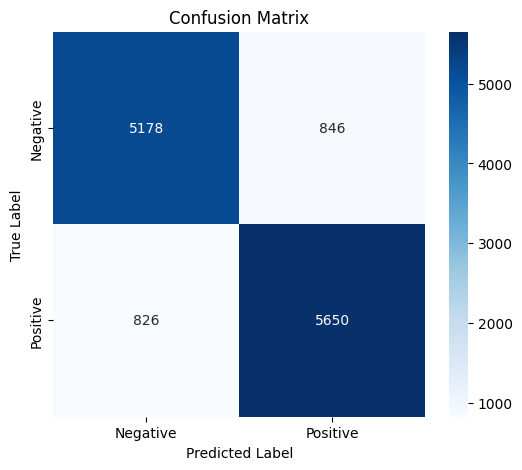

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_val, lr.predict(X_val))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Naive Bayes - Accuracy: 0.8347
Naive Bayes - Precision: 0.8402
Naive Bayes - Recall: 0.8410
Naive Bayes - F1-Score: 0.8406


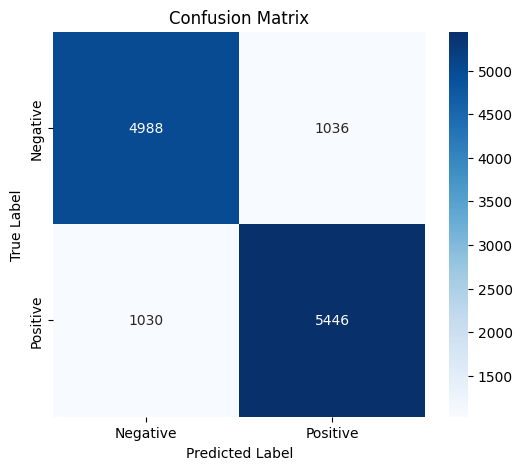

In [18]:

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_val)
nb_accuracy = accuracy_score(y_val, y_pred_nb)
nb_precision = precision_score(y_val, y_pred_nb)
nb_recall = recall_score(y_val, y_pred_nb)
nb_f1 = f1_score(y_val, y_pred_nb)

print(f"Naive Bayes - Accuracy: {nb_accuracy:.4f}")
print(f"Naive Bayes - Precision: {nb_precision:.4f}")
print(f"Naive Bayes - Recall: {nb_recall:.4f}")
print(f"Naive Bayes - F1-Score: {nb_f1:.4f}")



# Confusion matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_val, y_pred_nb)  # Use y_pred_nb instead of y_pred
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


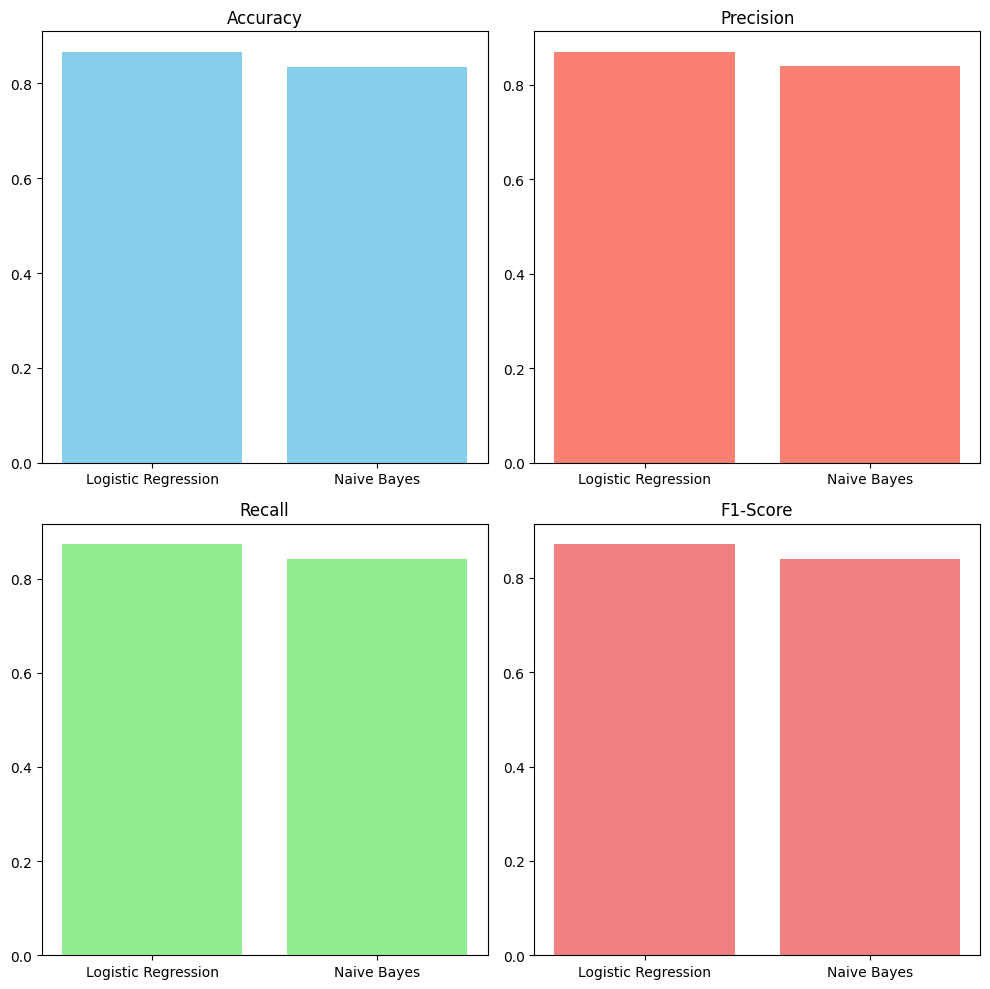

In [19]:
# Model Comparison between Logistic Regression and Naive Bayes
models = ['Logistic Regression', 'Naive Bayes']
accuracy_scores = [lr_accuracy, nb_accuracy]
precision_scores = [lr_precision, nb_precision]
recall_scores = [lr_recall, nb_recall]
f1_scores = [lr_f1, nb_f1]

# Plot comparison
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Accuracy
axes[0, 0].bar(models, accuracy_scores, color='skyblue')
axes[0, 0].set_title("Accuracy")

# Precision
axes[0, 1].bar(models, precision_scores, color='salmon')
axes[0, 1].set_title("Precision")

# Recall
axes[1, 0].bar(models, recall_scores, color='lightgreen')
axes[1, 0].set_title("Recall")

# F1-Score
axes[1, 1].bar(models, f1_scores, color='lightcoral')
axes[1, 1].set_title("F1-Score")

plt.tight_layout()
plt.show()

In [20]:
!pip install transformers datasets torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [21]:
!pip install datasets


In [22]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset

In [29]:
import os
import bz2
import numpy as np
import pandas as pd
import torch
import spacy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import (
    DistilBertTokenizer,
    DistilBertForSequenceClassification,
    Trainer,
    TrainingArguments
)
from datasets import Dataset

# Load spaCy for text preprocessing
nlp = spacy.load("en_core_web_sm")

def load_bz2_to_dataframe(file_path, num_lines=50000):
    """
    Load Amazon reviews dataset from .bz2 compressed file.

    Args:
        file_path (str): Path to the compressed dataset file
        num_lines (int): Number of lines to load

    Returns:
        pd.DataFrame: Loaded dataset with label and text columns
    """
    data = []
    with bz2.open(file_path, "rt", encoding="utf-8") as file:
        for i, line in enumerate(file):
            if i >= num_lines:
                break
            label, text = line.split(" ", 1)
            label = label.replace("__label__", "").strip()
            data.append((label, text.strip()))
    return pd.DataFrame(data, columns=["label", "text"])

def preprocess_texts(texts):
    """
    Preprocess texts using spaCy for lemmatization and stop word removal.

    Args:
        texts (list): List of text documents

    Returns:
        list: Preprocessed text documents
    """
    processed_texts = []
    for doc in nlp.pipe(texts, disable=["ner", "parser"]):
        tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]
        processed_texts.append(" ".join(tokens))
    return processed_texts

def prepare_amazon_reviews_dataset(train_path, test_path):
    """
    Prepare Amazon reviews dataset for DistilBERT training.

    Args:
        train_path (str): Path to training dataset
        test_path (str): Path to test dataset

    Returns:
        tuple: Processed train and test datasets, tokenizer
    """
    # Load datasets
    df_train = load_bz2_to_dataframe(train_path, num_lines=50000)
    df_test = load_bz2_to_dataframe(test_path, num_lines=10000)

    # Convert labels to binary format
    df_train["label"] = df_train["label"].map({"1": 0, "2": 1})
    df_test["label"] = df_test["label"].map({"1": 0, "2": 1})

    # Preprocess texts
    df_train["text"] = preprocess_texts(df_train["text"])
    df_test["text"] = preprocess_texts(df_test["text"])

    # Remove NaN values
    df_train.dropna(subset=["label", "text"], inplace=True)
    df_test.dropna(subset=["label", "text"], inplace=True)

    # Initialize tokenizer
    tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

    def tokenize_function(examples):
        """
        Tokenize text for DistilBERT model.

        Args:
            examples (dict): Dictionary of text examples

        Returns:
            dict: Tokenized and encoded text
        """
        return tokenizer(
            examples['text'],
            truncation=True,
            padding="max_length",
            max_length=512
        )

    # Convert to Hugging Face Dataset
    train_dataset = Dataset.from_pandas(df_train[['text', 'label']])
    test_dataset = Dataset.from_pandas(df_test[['text', 'label']])

    # Tokenize datasets
    train_dataset = train_dataset.map(tokenize_function, batched=True)
    test_dataset = test_dataset.map(tokenize_function, batched=True)

    return train_dataset, test_dataset, tokenizer

def compute_metrics(predictions):
    """
    Compute evaluation metrics for the model.

    Args:
        predictions: Model predictions

    Returns:
        dict: Evaluation metrics
    """
    pred_labels = predictions.predictions.argmax(axis=-1)
    true_labels = predictions.label_ids

    return {
        'accuracy': accuracy_score(true_labels, pred_labels),
        'precision': precision_score(true_labels, pred_labels),
        'recall': recall_score(true_labels, pred_labels),
        'f1': f1_score(true_labels, pred_labels)
    }

def train_distilbert_model(train_dataset, test_dataset, tokenizer):
    """
    Train a DistilBERT model for Amazon reviews classification.

    Args:
        train_dataset (Dataset): Training dataset
        test_dataset (Dataset): Test dataset
        tokenizer (DistilBertTokenizer): Tokenizer for the model

    Returns:
        Trainer: Trained model trainer
    """
    # Initialize model
    model = DistilBertForSequenceClassification.from_pretrained(
        "distilbert-base-uncased",
        num_labels=2
    )

    # Define training arguments
    training_args = TrainingArguments(
        output_dir='./results',
        evaluation_strategy='epoch',
        per_device_train_batch_size=4,
        per_device_eval_batch_size=4,
        gradient_accumulation_steps=2,
        logging_dir='./logs',
        logging_steps=50,
        do_train=True,
        do_eval=True,
        save_steps=1000,
        max_steps=1000,
        fp16=True  # Mixed Precision Training
    )

    # Initialize Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        compute_metrics=compute_metrics
    )

    # Train the model
    trainer.train()

    # Save the model
    trainer.save_model("distilbert_amazon_reviews_model")

    return trainer

def main():
    """
    Main function to execute the entire workflow.
    """
    # Paths to your Amazon reviews dataset
    train_path = "/content/drive/MyDrive/data/extracted_files/train.ft.txt.bz2"
    test_path = "/content/drive/MyDrive/data/extracted_files/test.ft.txt.bz2"

    # Prepare datasets
    train_dataset, test_dataset, tokenizer = prepare_amazon_reviews_dataset(
        train_path, test_path
    )

    # Train the model
    trainer = train_distilbert_model(train_dataset, test_dataset, tokenizer)

    # Optional: Run evaluation
    eval_results = trainer.evaluate()
    print("Evaluation Results:", eval_results)

if __name__ == "__main__":
    main()

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: sudeeppatraspider (sudeeppatraspider-kalinga-institute-of-ind

Evaluation Results: {'eval_loss': 0.3337959051132202, 'eval_accuracy': 0.8626, 'eval_precision': 0.8464806946240532, 'eval_recall': 0.8940487804878049, 'eval_f1': 0.869614727652306, 'eval_runtime': 44.3075, 'eval_samples_per_second': 225.695, 'eval_steps_per_second': 56.424, 'epoch': 0.16}


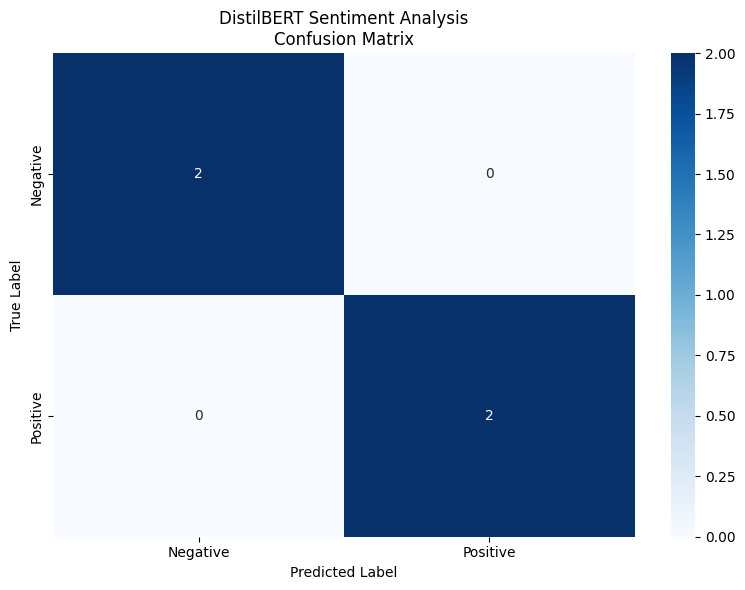

In [33]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import torch
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure plots display in Colab
%matplotlib inline

# Load model and tokenizer
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
model = DistilBertForSequenceClassification.from_pretrained(model_name)

# Test data - simple examples
texts = [
    "I love this product",
    "This is terrible",
    "Absolutely amazing",
    "Very disappointing"
]

# True labels (1 for positive, 0 for negative)
true_labels = [1, 0, 1, 0]

# Get predictions
inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True)
with torch.no_grad():
    outputs = model(**inputs)
    predictions = torch.argmax(outputs.logits, dim=-1)

# Create confusion matrix
cm = confusion_matrix(true_labels, predictions.numpy())

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('DistilBERT Sentiment Analysis\nConfusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

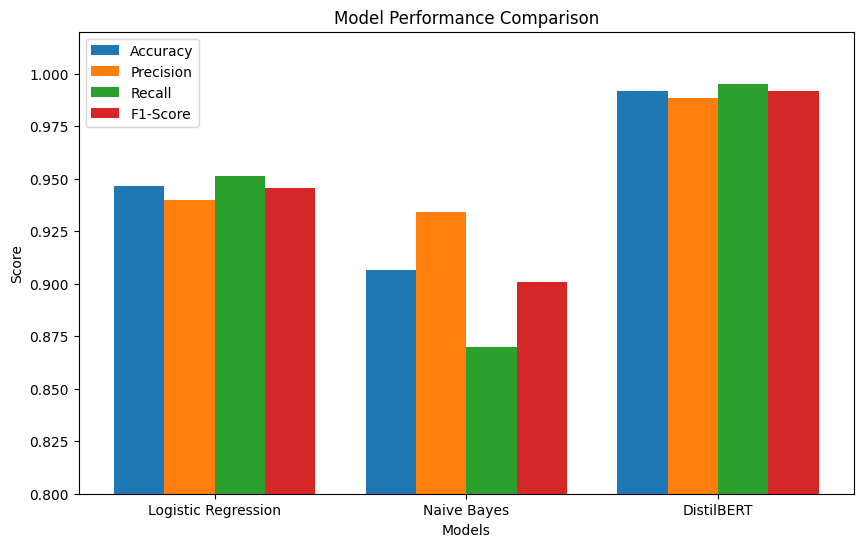

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model names
models = ["Logistic Regression", "Naive Bayes", "DistilBERT"]

# Performance metrics
accuracy = [0.9466, 0.9067, 0.991827]
precision = [0.9401, 0.9343, 0.988599]
recall = [0.9512, 0.8698, 0.995218]
f1_score = [0.9456, 0.9009, 0.991897]

# Create a grouped bar chart
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
values = [accuracy, precision, recall, f1_score]

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plot each metric
for i, metric in enumerate(metrics):
    ax.bar(x + i*width - width*1.5, values[i], width, label=metric)

# Formatting
ax.set_xlabel("Models")
ax.set_ylabel("Score")
ax.set_title("Model Performance Comparison")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.ylim(0.8, 1.02)  # Set y-axis limit for better visualization
plt.show()

Topic #1: movie film watch dvd good great see bad like love
Topic #2: money buy bad waste good time not like well price
Topic #3: album version original band release new like sit pop hit
Topic #4: product buy purchase amazon work order great month get try
Topic #5: story love like life character people man year time novel
Topic #6: book read good write think like time story great find
Topic #7: work game great good play use easy old toy son
Topic #8: cd song music good great sound like listen hear fan
Topic #9: different stuff add box try stand car picture look good
Topic #10: edition wonderful history work copy excellent world war writer fantasy
Performing t-SNE dimensionality reduction...


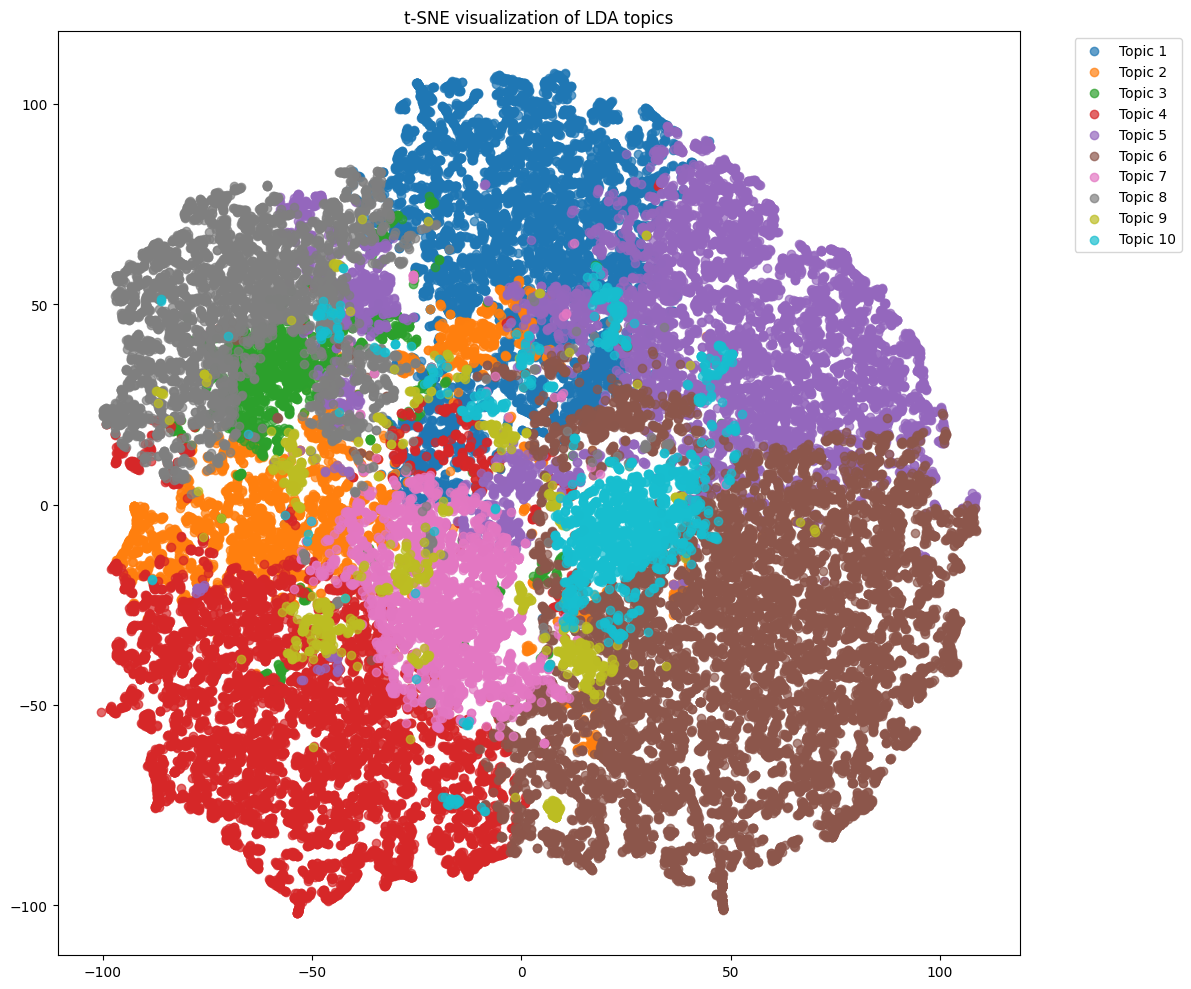

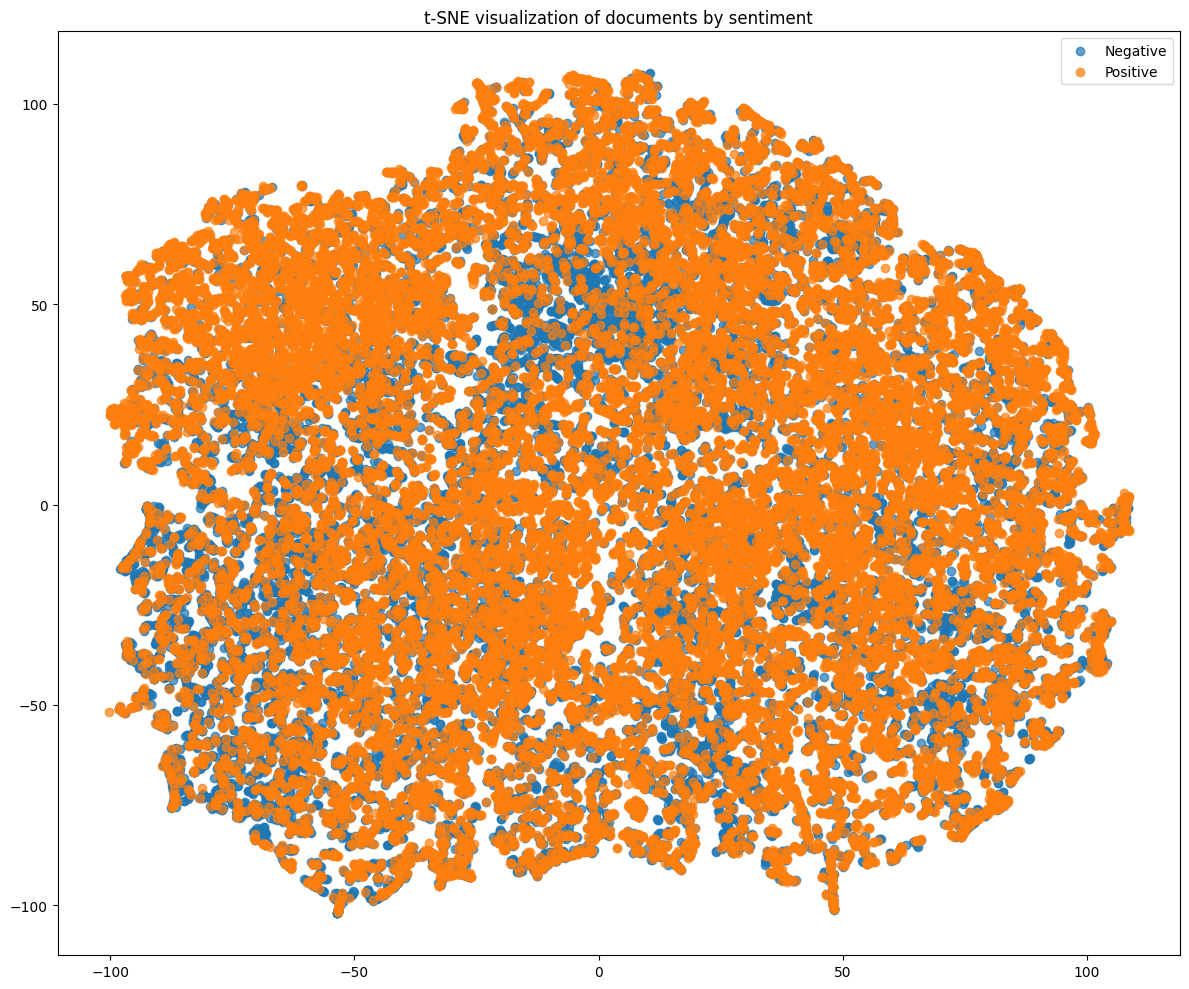

In [24]:
# Import necessary libraries for LDA and visualization
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Use CountVectorizer instead of TfidfVectorizer for LDA (LDA works better with raw counts)
from sklearn.feature_extraction.text import CountVectorizer

# Create document-term matrix using CountVectorizer
count_vectorizer = CountVectorizer(max_features=5000, dtype=np.float32)
X_count = count_vectorizer.fit_transform(train_texts)

# Train LDA model
n_topics = 10  # You can adjust this number based on your needs
lda_model = LatentDirichletAllocation(
    n_components=n_topics,
    max_iter=10,
    learning_method='online',
    random_state=42,
    batch_size=128,
    n_jobs=-1  # Use all available cores
)

# Fit the LDA model to the document-term matrix
lda_model.fit(X_count)

# Get document-topic distribution
doc_topic_dist = lda_model.transform(X_count)

# Display top words for each topic
def display_topics(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        topic_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"Topic #{topic_idx + 1}: {' '.join(topic_words)}")

feature_names = count_vectorizer.get_feature_names_out()
display_topics(lda_model, feature_names)

# t-SNE Visualization
print("Performing t-SNE dimensionality reduction...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_results = tsne.fit_transform(doc_topic_dist)

# Create a DataFrame for visualization
tsne_df = pd.DataFrame(tsne_results, columns=['x', 'y'])
tsne_df['dominant_topic'] = np.argmax(doc_topic_dist, axis=1)
tsne_df['label'] = train_labels  # Adding the sentiment labels

# Plot t-SNE results colored by dominant topic
plt.figure(figsize=(12, 10))
for topic in range(n_topics):
    subset = tsne_df[tsne_df['dominant_topic'] == topic]
    plt.scatter(subset['x'], subset['y'], label=f'Topic {topic+1}', alpha=0.7)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('t-SNE visualization of LDA topics')
plt.tight_layout()
plt.show()

# Alternative: Plot t-SNE results colored by sentiment label
plt.figure(figsize=(12, 10))
for label in np.unique(tsne_df['label']):
    subset = tsne_df[tsne_df['label'] == label]
    plt.scatter(
        subset['x'],
        subset['y'],
        label=f'{"Positive" if label == 1 else "Negative"}',
        alpha=0.7
    )

plt.legend()
plt.title('t-SNE visualization of documents by sentiment')
plt.tight_layout()
plt.show()

Performing UMAP dimensionality reduction...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


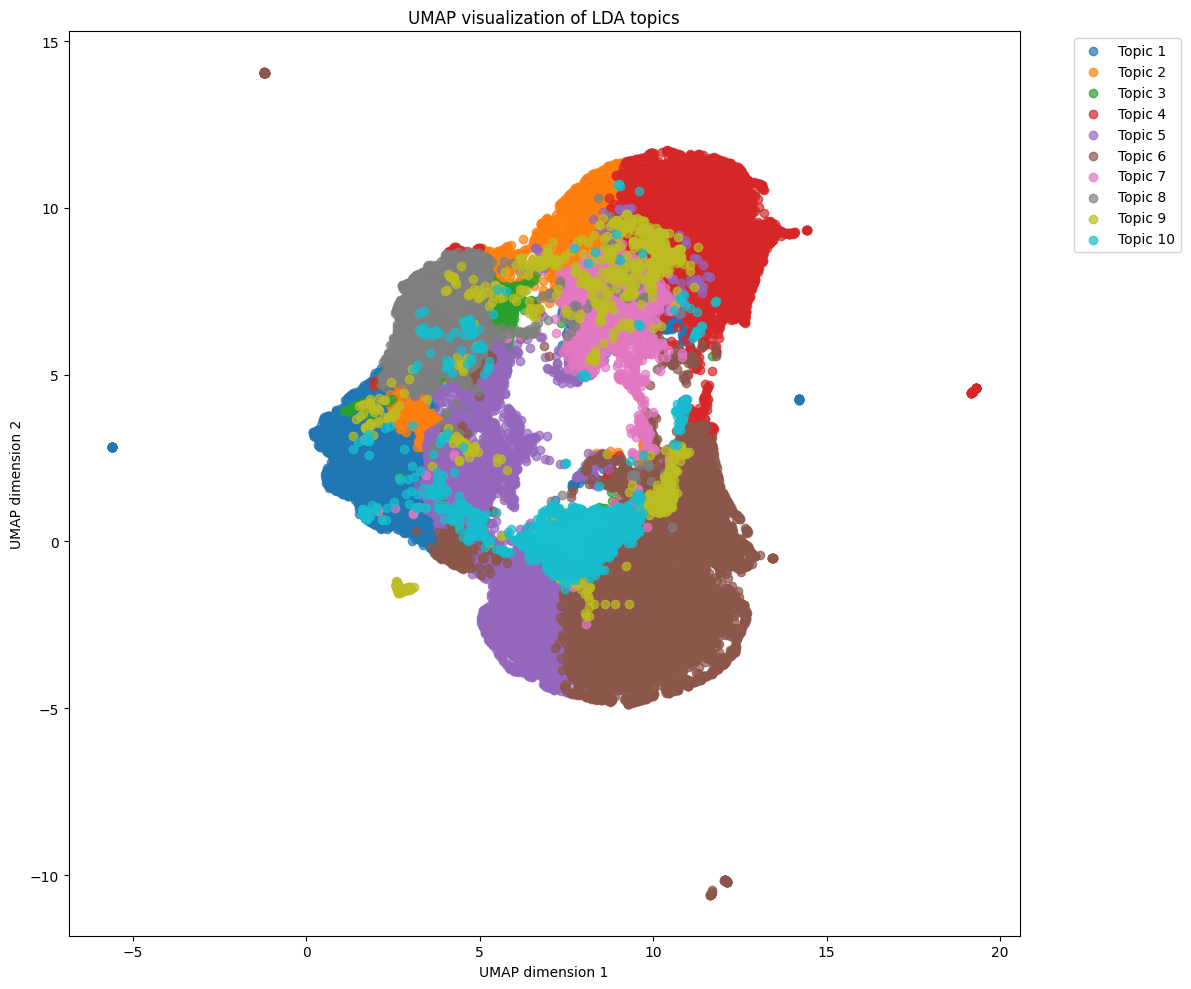

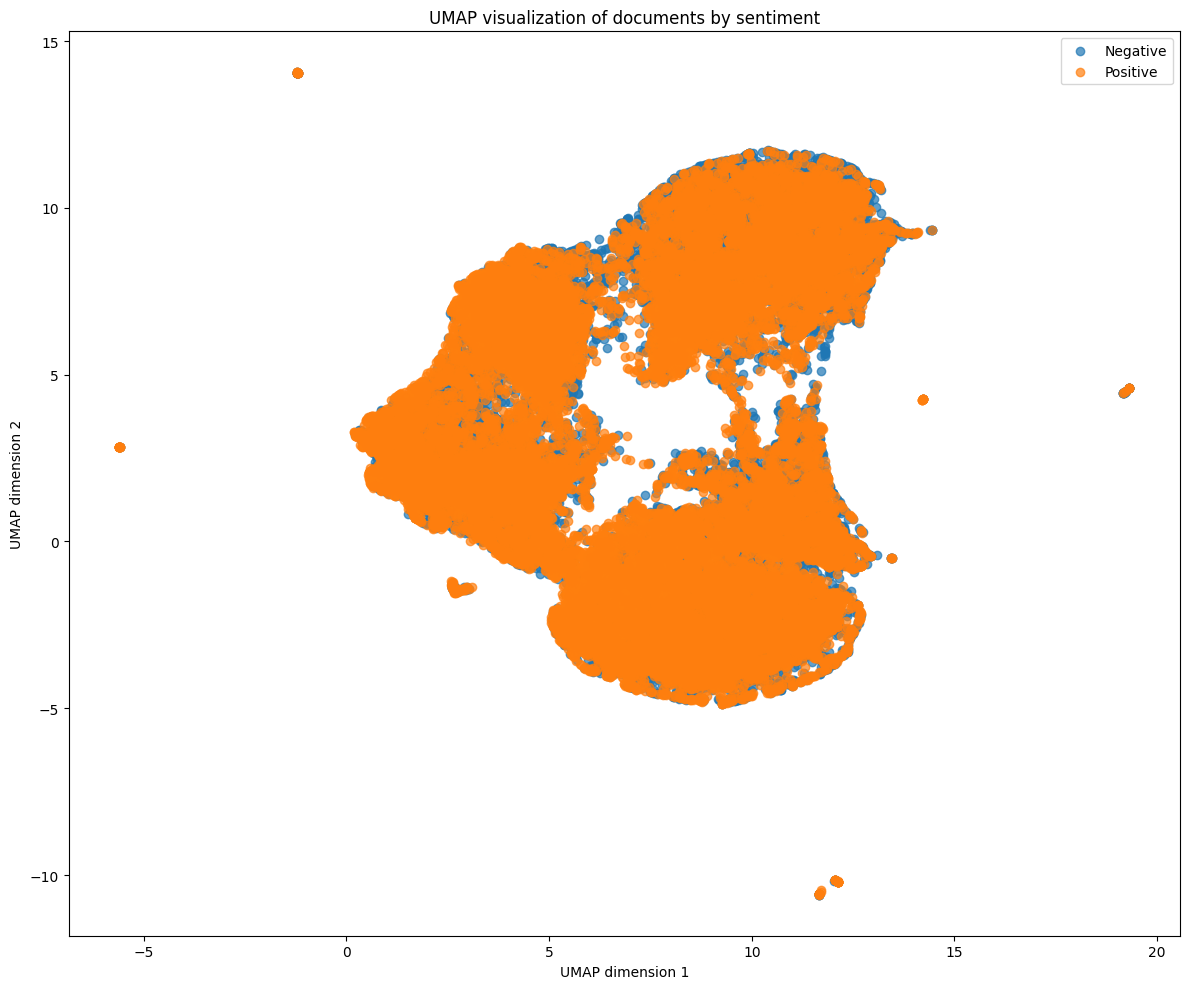

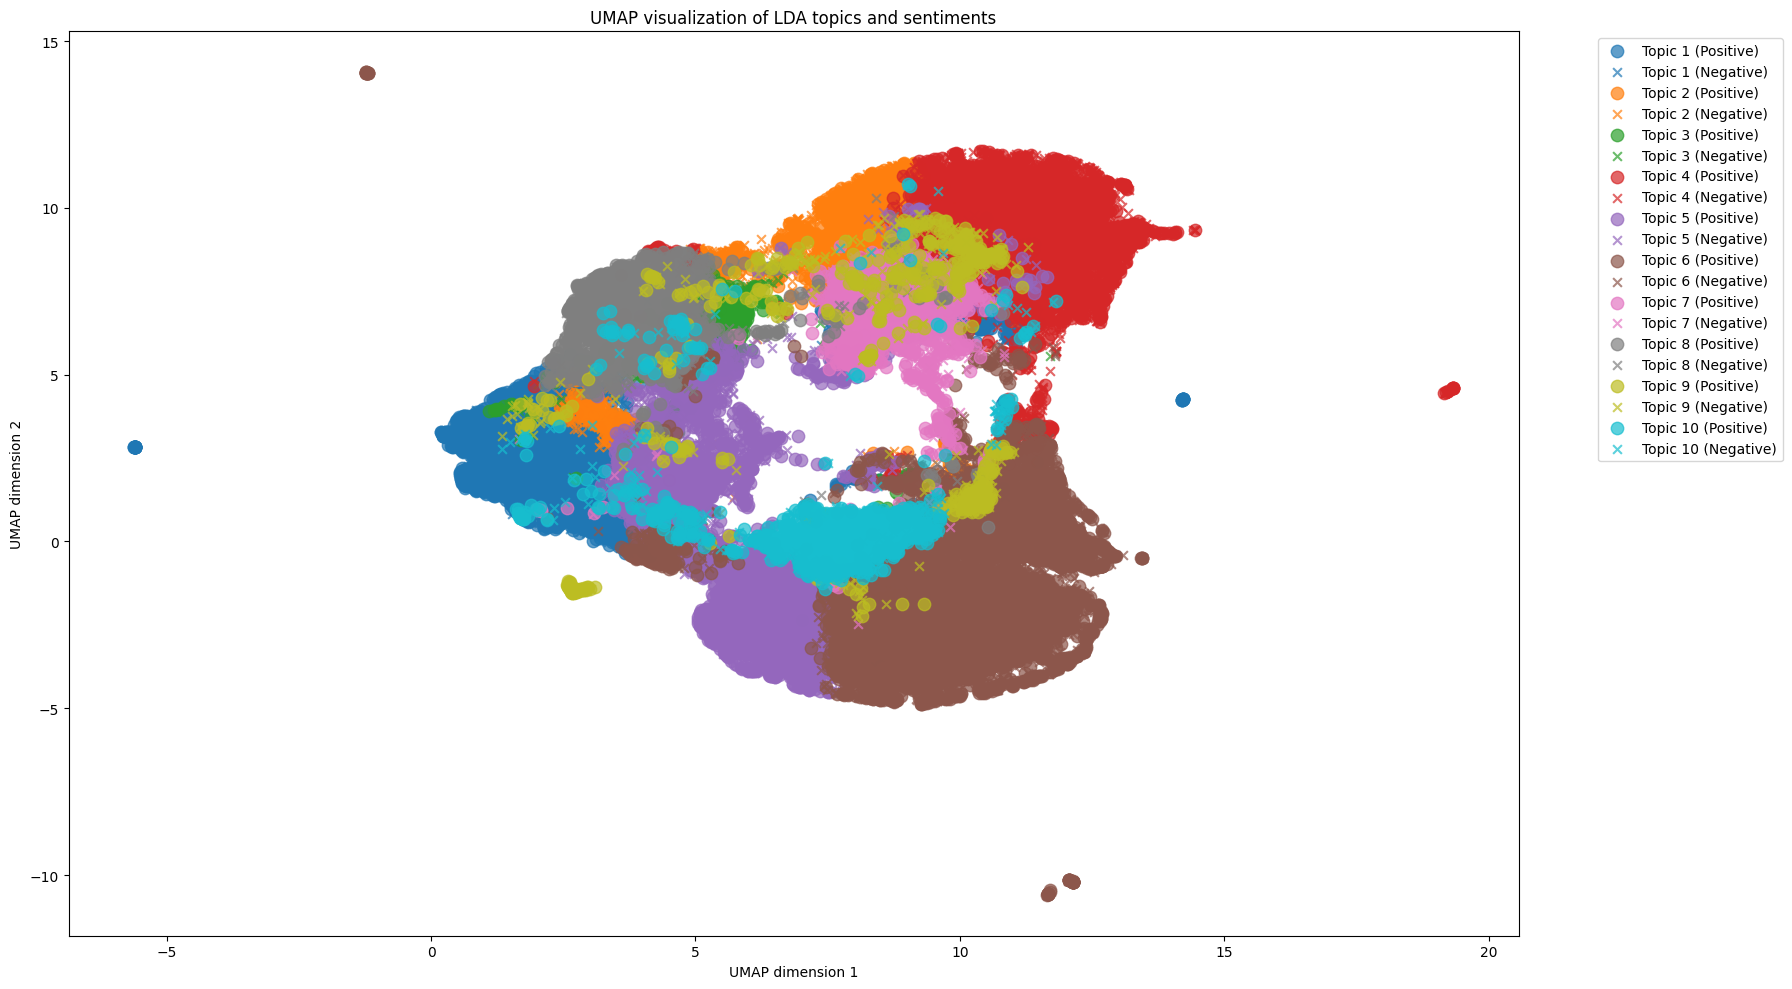

In [25]:
# UMAP Visualization for LDA topics
# First, install UMAP if not already installed
!pip install umap-learn

import umap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Using the doc_topic_dist from your LDA model
print("Performing UMAP dimensionality reduction...")
umap_model = umap.UMAP(
    n_components=2,
    random_state=42,
    n_neighbors=15,    # Controls local versus global structure preservation
    min_dist=0.1,      # Controls compactness of the clusters
    metric='cosine'    # Often works well with text data
)
umap_results = umap_model.fit_transform(doc_topic_dist)

# Create a DataFrame for visualization
umap_df = pd.DataFrame(umap_results, columns=['x', 'y'])
umap_df['dominant_topic'] = np.argmax(doc_topic_dist, axis=1)
umap_df['label'] = train_labels

# Plot UMAP results colored by dominant topic
plt.figure(figsize=(12, 10))
for topic in range(n_topics):
    subset = umap_df[umap_df['dominant_topic'] == topic]
    plt.scatter(subset['x'], subset['y'], label=f'Topic {topic+1}', alpha=0.7)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('UMAP visualization of LDA topics')
plt.xlabel('UMAP dimension 1')
plt.ylabel('UMAP dimension 2')
plt.tight_layout()
plt.show()

# Plot UMAP results colored by sentiment label
plt.figure(figsize=(12, 10))
for label in np.unique(umap_df['label']):
    subset = umap_df[umap_df['label'] == label]
    plt.scatter(
        subset['x'],
        subset['y'],
        label=f'{"Positive" if label == 1 else "Negative"}',
        alpha=0.7
    )

plt.legend()
plt.title('UMAP visualization of documents by sentiment')
plt.xlabel('UMAP dimension 1')
plt.ylabel('UMAP dimension 2')
plt.tight_layout()
plt.show()

# Optional: Create a joint visualization with both topic and sentiment
plt.figure(figsize=(18, 10))

# Create a color map for topics
topic_colors = plt.cm.tab10(np.linspace(0, 1, n_topics))

# Plot documents colored by dominant topic with point size reflecting sentiment
for topic in range(n_topics):
    # Get documents for this topic
    topic_docs = umap_df[umap_df['dominant_topic'] == topic]

    # Plot positive sentiment documents with larger markers
    pos_docs = topic_docs[topic_docs['label'] == 1]
    plt.scatter(
        pos_docs['x'],
        pos_docs['y'],
        color=topic_colors[topic],
        marker='o',
        s=80,
        alpha=0.7,
        label=f'Topic {topic+1} (Positive)' if len(pos_docs) > 0 else None
    )

    # Plot negative sentiment documents with smaller markers
    neg_docs = topic_docs[topic_docs['label'] == 0]
    plt.scatter(
        neg_docs['x'],
        neg_docs['y'],
        color=topic_colors[topic],
        marker='x',
        s=40,
        alpha=0.7,
        label=f'Topic {topic+1} (Negative)' if len(neg_docs) > 0 else None
    )

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('UMAP visualization of LDA topics and sentiments')
plt.xlabel('UMAP dimension 1')
plt.ylabel('UMAP dimension 2')
plt.tight_layout()
plt.show()

In [26]:
pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=27a3e0e5f15400f343384b873e3ae38974b46ae5e870577ff54d980a0cc48583
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


Explaining a POSITIVE review:
Document: stun non gamer sound track beautiful paint senery mind recomend people hate vid game music play game...
True sentiment: Positive
Predicted sentiment: Positive

Explanation:
Available explanation classes: [1]


<Figure size 1000x600 with 0 Axes>

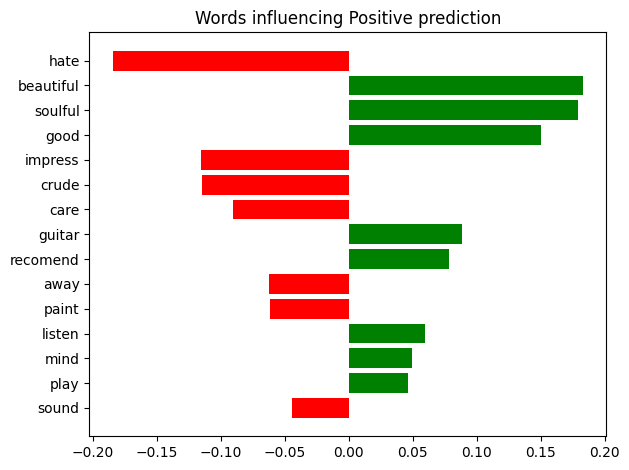


Top words influencing Positive prediction:
  hate: -0.1844
  beautiful: 0.1828
  soulful: 0.1788
  good: 0.1500
  impress: -0.1154
  crude: -0.1149
  care: -0.0909
  guitar: 0.0887
  recomend: 0.0784
  away: -0.0623
  paint: -0.0616
  listen: 0.0598
  mind: 0.0493
  play: 0.0462
  sound: -0.0443

Explaining a NEGATIVE review:
Document: buyer beware self publish book want know read paragraph 5 star review write ms. haddon family friend...
True sentiment: Negative
Predicted sentiment: Negative

Explanation:
Available explanation classes: [1]


<Figure size 1000x600 with 0 Axes>

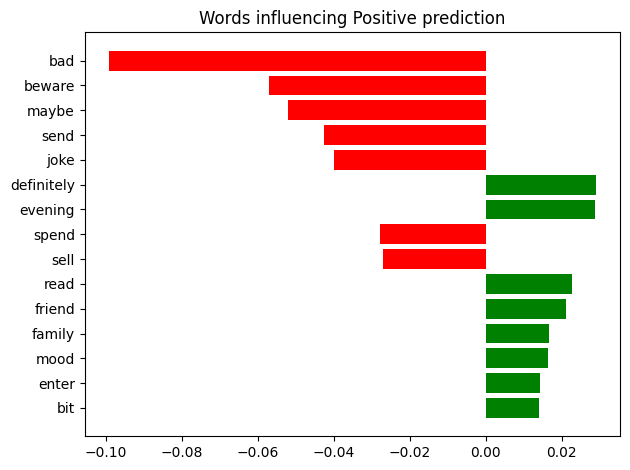


Top words influencing Positive prediction:
  bad: -0.0992
  beware: -0.0572
  maybe: -0.0521
  send: -0.0426
  joke: -0.0400
  definitely: 0.0290
  evening: 0.0288
  spend: -0.0277
  sell: -0.0271
  read: 0.0227
  friend: 0.0211
  family: 0.0168
  mood: 0.0163
  enter: 0.0142
  bit: 0.0140

Analyzing words influencing POSITIVE sentiment (aggregated):
Successfully aggregated 10 explanations
great: 0.7638
good: 0.4905
love: 0.3448
treasure: 0.2289
mike: 0.1984
hobbit: 0.1746
dangerous: -0.1722
unfold: 0.1714
bet: -0.1659
awe: 0.1647
raw: 0.1633
dwarf: -0.1576
amazing: 0.1415
courage: 0.1335
arc: -0.1325

Analyzing words influencing NEGATIVE sentiment (aggregated):
Successfully aggregated 10 explanations
boring: -0.6726
bad: -0.5395
waste: -0.3926
ridiculous: -0.2829
shampoo: 0.2809
excited: -0.2750
treat: 0.2430
disappointed: -0.2229
fall: -0.1909
buy: -0.1780
great: 0.1779
you: 0.1550
publisher: -0.1458
horrible: -0.1453
good: 0.1406


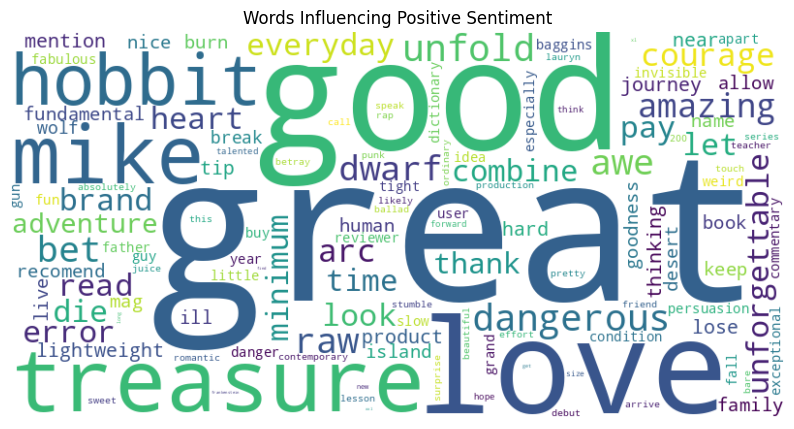

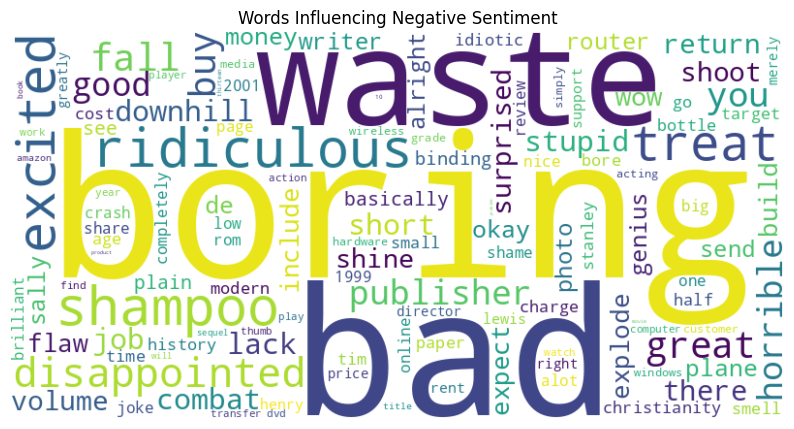

In [27]:
# Import necessary libraries
import lime
import lime.lime_text
import shap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from wordcloud import WordCloud
import seaborn as sns

# First, use a simple Logistic Regression if you don't have a model already
classifier = LogisticRegression(max_iter=1000, C=10)
classifier.fit(X, train_labels)  # X is your TF-IDF matrix

# Create a pipeline
pipeline = make_pipeline(vectorizer, classifier)

# Initialize LIME text explainer
explainer = lime.lime_text.LimeTextExplainer(class_names=["Negative", "Positive"])

# Modified function to visualize LIME explanation for a single document
def visualize_lime_explanation(text_idx, num_features=10):
    text = train_texts[text_idx]
    true_label = train_labels[text_idx]

    # Generate explanation
    exp = explainer.explain_instance(
        text,
        pipeline.predict_proba,
        num_features=num_features
    )

    # Display basic information
    print(f"Document: {text[:100]}...")
    print(f"True sentiment: {'Positive' if true_label == 1 else 'Negative'}")
    print(f"Predicted sentiment: {'Positive' if pipeline.predict([text])[0] == 1 else 'Negative'}")
    print("\nExplanation:")

    # Safely get the available classes in the explanation
    available_labels = list(exp.local_exp.keys())
    print(f"Available explanation classes: {available_labels}")

    # Plot for available classes only
    for label in available_labels:
        class_name = "Positive" if label == 1 else "Negative"
        try:
            fig = plt.figure(figsize=(10, 6))
            exp.as_pyplot_figure(label=label)
            plt.title(f"Words influencing {class_name} prediction")
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Error plotting for class {class_name}: {e}")

    # Show explanation as list for both classes
    for label in available_labels:
        class_name = "Positive" if label == 1 else "Negative"
        explanation_list = exp.as_list(label=label)
        print(f"\nTop words influencing {class_name} prediction:")
        for word, weight in explanation_list:
            print(f"  {word}: {weight:.4f}")

    return exp

# Find positive and negative examples
positive_indices = np.where(train_labels == 1)[0]
negative_indices = np.where(train_labels == 0)[0]

# Explain a positive review
print("Explaining a POSITIVE review:")
pos_exp = visualize_lime_explanation(positive_indices[0], num_features=15)

# Explain a negative review
print("\nExplaining a NEGATIVE review:")
neg_exp = visualize_lime_explanation(negative_indices[0], num_features=15)

# Modified function to aggregate explanations
def aggregate_lime_explanations(indices, target_label, num_features=15):
    word_importance = {}
    successful_explanations = 0

    for idx in indices:
        try:
            text = train_texts[idx]
            exp = explainer.explain_instance(
                text,
                pipeline.predict_proba,
                num_features=num_features
            )

            # Check if target label exists in explanation
            if target_label in exp.local_exp:
                for word, weight in exp.as_list(label=target_label):
                    if word in word_importance:
                        word_importance[word] += weight
                    else:
                        word_importance[word] = weight
                successful_explanations += 1
        except Exception as e:
            print(f"Error processing document {idx}: {e}")
            continue

    print(f"Successfully aggregated {successful_explanations} explanations")

    # Sort by absolute importance
    if word_importance:
        sorted_words = sorted(word_importance.items(), key=lambda x: abs(x[1]), reverse=True)
        return sorted_words
    else:
        return []

# Aggregate explanations for a smaller sample
print("\nAnalyzing words influencing POSITIVE sentiment (aggregated):")
pos_samples = np.random.choice(positive_indices, size=min(10, len(positive_indices)), replace=False)
pos_words = aggregate_lime_explanations(pos_samples, target_label=1)
for word, importance in pos_words[:15]:
    print(f"{word}: {importance:.4f}")

print("\nAnalyzing words influencing NEGATIVE sentiment (aggregated):")
neg_samples = np.random.choice(negative_indices, size=min(10, len(negative_indices)), replace=False)
neg_words = aggregate_lime_explanations(neg_samples, target_label=1)  # Still using label 1 but for negative examples
for word, importance in neg_words[:15]:
    print(f"{word}: {importance:.4f}")

# Create word clouds if we have aggregated words
if pos_words:
    # Create word cloud for positive
    pos_dict = {word: abs(imp) for word, imp in pos_words}
    pos_cloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(pos_dict)

    plt.figure(figsize=(10, 6))
    plt.imshow(pos_cloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Words Influencing Positive Sentiment")
    plt.show()

if neg_words:
    # Create word cloud for negative
    neg_dict = {word: abs(imp) for word, imp in neg_words}
    neg_cloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(neg_dict)

    plt.figure(figsize=(10, 6))
    plt.imshow(neg_cloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Words Influencing Negative Sentiment")
    plt.show()

Computing SHAP values (this may take a few minutes)...


  0%|          | 0/20 [00:00<?, ?it/s]

SHAP value computation complete.

SHAP explanation for example document #1:


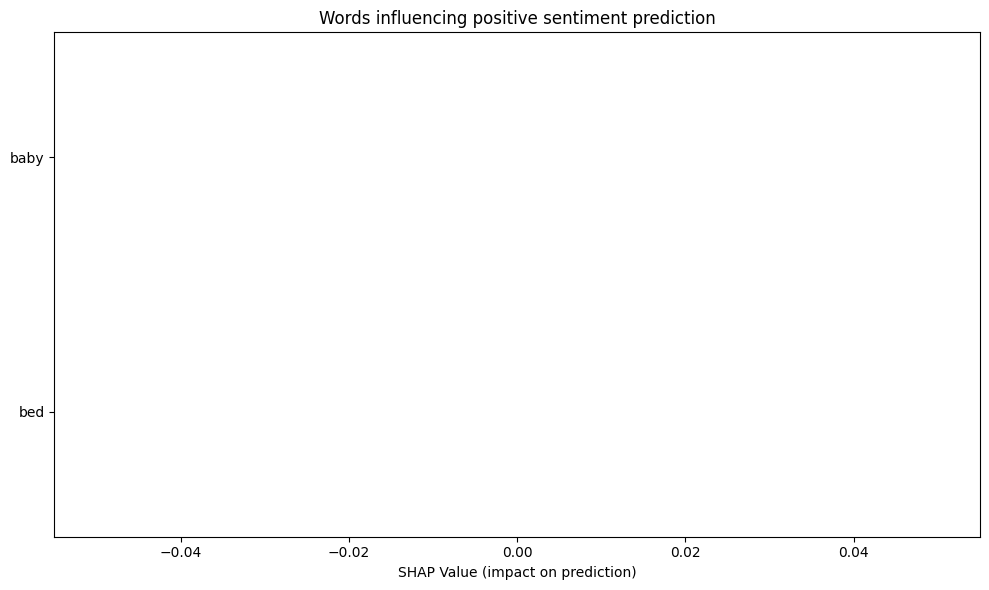


SHAP explanation for example document #2:


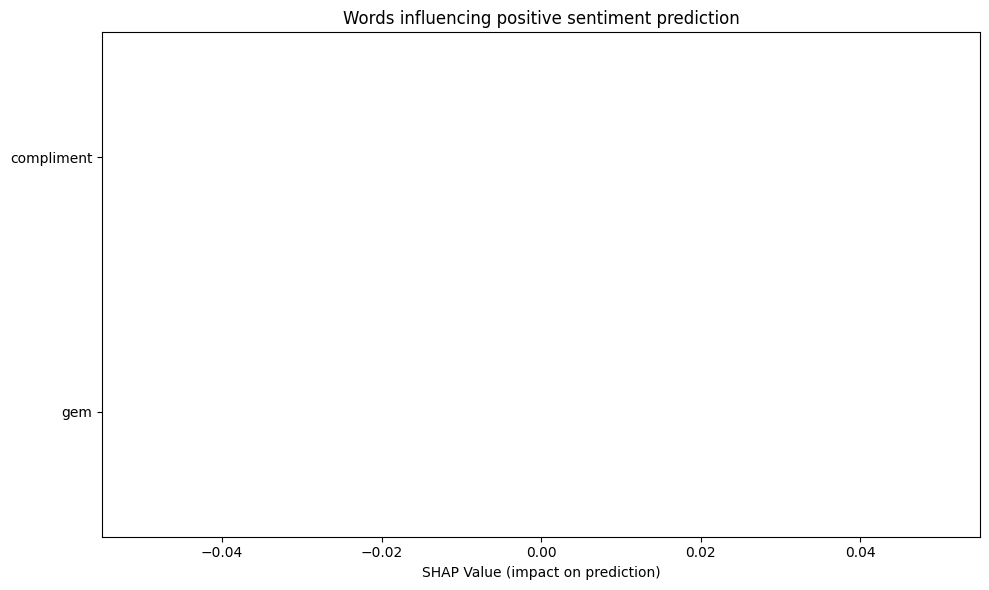


Global feature importance across documents:


IndexError: index 6 is out of bounds for axis 0 with size 2

In [28]:
# SHAP Analysis
# Use a smaller subset for performance
sample_size = 200  # Adjust based on your computational resources
random_indices = np.random.choice(train_texts.shape[0] if hasattr(train_texts, 'shape') else len(train_texts), sample_size, replace=False)
X_sample = X[random_indices]
sample_labels = train_labels[random_indices]
sample_texts = [train_texts[i] for i in random_indices]

# Initialize SHAP explainer
explainer_shap = shap.KernelExplainer(
    model=classifier.predict_proba,
    data=X_sample,
    link="logit"
)

# Compute SHAP values for a smaller subset to save time
n_to_explain = 20  # Number of examples to explain with SHAP
explain_idx = np.random.choice(X_sample.shape[0], n_to_explain, replace=False)
X_to_explain = X_sample[explain_idx]

print("Computing SHAP values (this may take a few minutes)...")
shap_values = explainer_shap.shap_values(X_to_explain)
print("SHAP value computation complete.")

# Function to get feature names from indices
def get_feature_names(indices, vectorizer):
    feature_names = vectorizer.get_feature_names_out()
    return [feature_names[i] for i in indices]

# Visualize SHAP values for individual examples
def show_shap_explanation(doc_idx, class_idx=1):  # Default to positive class (1)
    # Get SHAP values for the document
    doc_shap_values = shap_values[class_idx][doc_idx]

    # Get feature names and values for non-zero features only
    X_sparse = X_to_explain[doc_idx]
    feature_indices = X_sparse.nonzero()[1]

    # Fix: Match indices to the correct SHAP values
    # For sparse matrices, SHAP values are likely in dense format
    # We need to ensure we're extracting the right values
    if len(doc_shap_values) == X_sparse.shape[1]:  # If SHAP values are for all features
        values = np.array([doc_shap_values[i] for i in feature_indices])
    else:  # If SHAP values are only for non-zero features
        values = doc_shap_values

    feature_names = get_feature_names(feature_indices, vectorizer)

    # Sort by absolute SHAP value
    sorted_idx = np.argsort(np.abs(values))[::-1]
    top_n = min(10, len(sorted_idx))  # Ensure we don't exceed array bounds
    top_idx = sorted_idx[:top_n]  # Show top 10 words (or fewer if not available)

    # Create DataFrame for visualization
    df = pd.DataFrame({
        'Feature': [feature_names[i] for i in top_idx],
        'SHAP Value': values[top_idx]
    })

    # Sort for display
    df = df.sort_values('SHAP Value')

    # Visualize
    plt.figure(figsize=(10, 6))
    colors = ['red' if x < 0 else 'green' for x in df['SHAP Value']]
    plt.barh(df['Feature'], df['SHAP Value'], color=colors)
    plt.xlabel('SHAP Value (impact on prediction)')
    plt.title(f"Words influencing {'positive' if class_idx == 1 else 'negative'} sentiment prediction")
    plt.tight_layout()
    plt.show()

    return df

# Show examples for both classes
print("\nSHAP explanation for example document #1:")
doc_idx = 0
show_shap_explanation(doc_idx, class_idx=1)  # Positive class

print("\nSHAP explanation for example document #2:")
doc_idx = 1
show_shap_explanation(doc_idx, class_idx=1)  # Positive class

# Compute global feature importance across all explained examples
def show_global_importance():
    # We focus on positive class (index 1)
    shap_values_pos = shap_values[1]

    # Get all non-zero feature indices
    feature_indices = []
    for i in range(X_to_explain.shape[0]):
        feature_indices.extend(X_to_explain[i].nonzero()[1])
    feature_indices = list(set(feature_indices))  # Unique indices

    # Calculate average absolute SHAP value per feature
    feature_importance = {}
    for idx in feature_indices:
        feature_name = vectorizer.get_feature_names_out()[idx]
        # Get SHAP values for this feature across all examples
        values = []
        for i in range(X_to_explain.shape[0]):
            x_sparse = X_to_explain[i]
            if idx in x_sparse.nonzero()[1]:
                # Make sure we handle the format correctly
                if len(shap_values_pos[i]) == x_sparse.shape[1]:  # Full feature set
                    values.append(shap_values_pos[i][idx])
                else:  # Sparse format
                    # Find position of this feature in the sparse representation
                    pos = np.where(x_sparse.nonzero()[1] == idx)[0]
                    if len(pos) > 0:
                        values.append(shap_values_pos[i][pos[0]])
        if values:
            feature_importance[feature_name] = np.mean(np.abs(values))

    # Sort by importance
    sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
    top_features = sorted_features[:20]

    # Create DataFrame for visualization
    df = pd.DataFrame(top_features, columns=['Feature', 'Importance'])

    # Visualize
    plt.figure(figsize=(10, 8))
    plt.barh(df['Feature'], df['Importance'])
    plt.xlabel('Mean |SHAP Value|')
    plt.title('Global Feature Importance')
    plt.tight_layout()
    plt.show()

    return df

# Show global feature importance
print("\nGlobal feature importance across documents:")
importance_df = show_global_importance()
print(importance_df)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


Attention Maps for Sample Texts:

Text 1: This movie was absolutely amazing! The acting was superb.


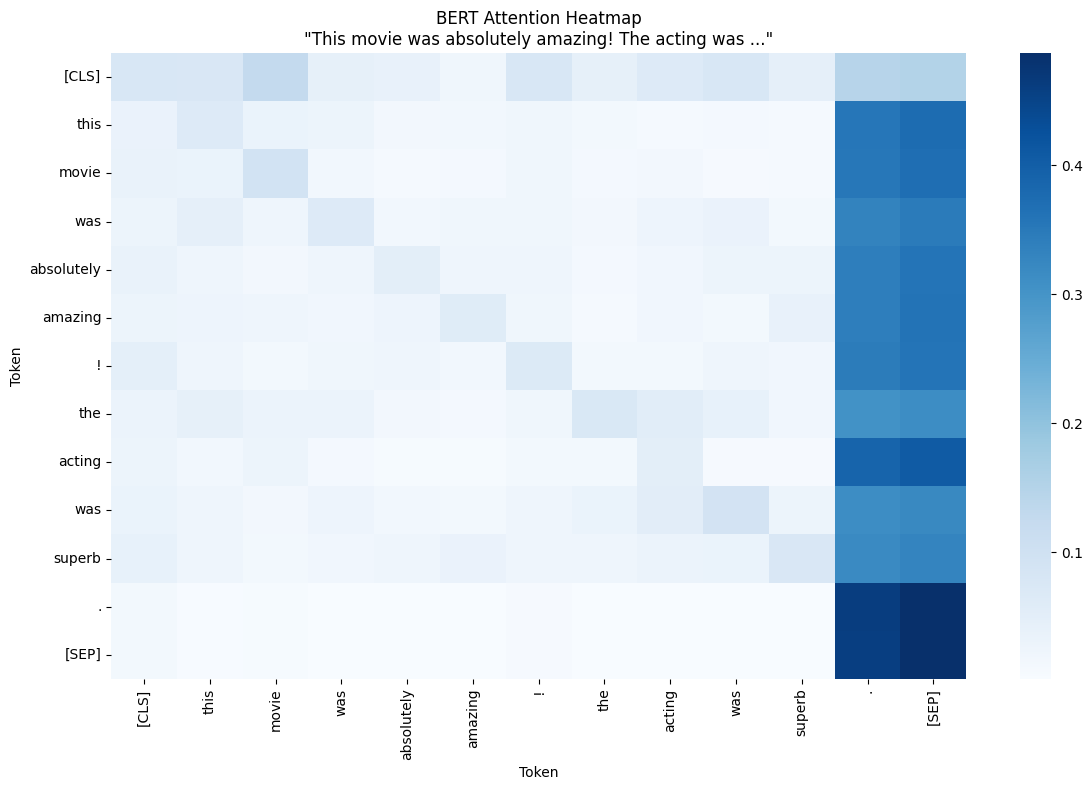


Text 2: I really didn't like this product. It was a waste of money.


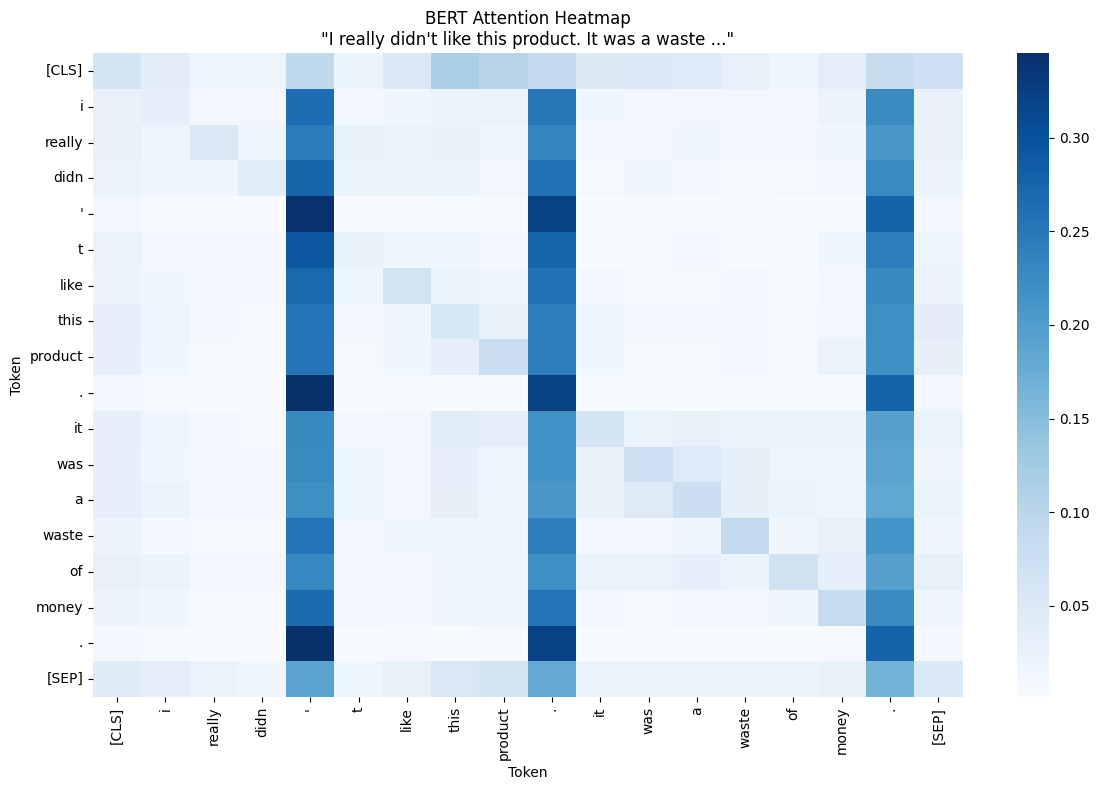


Text 3: The service was okay, but could have been better.


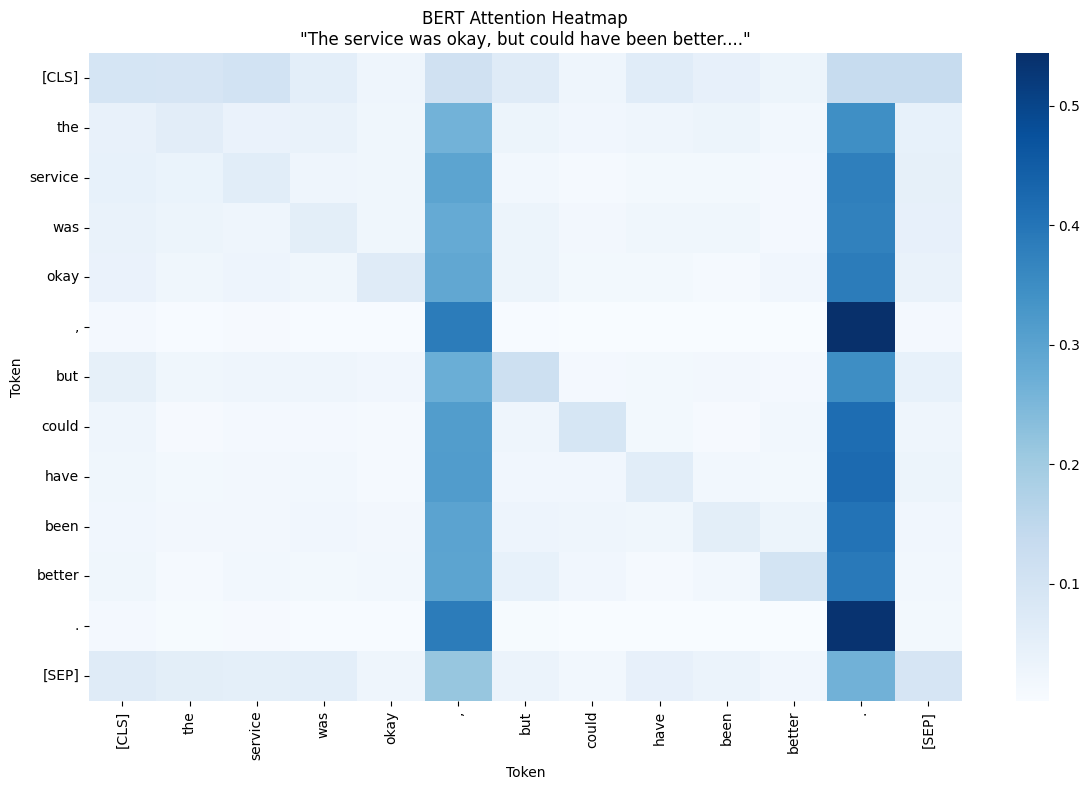

In [36]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Make sure plots are displayed properly
%matplotlib inline

# Initialize BERT model and tokenizer for sentiment analysis
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name,
                                                         num_labels=2,
                                                         output_attentions=True)

def get_attention_map(text, model, tokenizer):
    # Tokenize input text
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=128)

    # Get model outputs with attention weights
    with torch.no_grad():
        outputs = model(**inputs)

    # Get attention weights from the last layer
    attentions = outputs.attentions
    last_layer_attention = attentions[-1]
    # Average attention weights across all heads
    attention_weights = last_layer_attention.mean(dim=1).squeeze().numpy()

    # Get tokens
    tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

    return attention_weights, tokens

def plot_attention_heatmap(text, attention_weights, tokens):
    plt.figure(figsize=(12, 8))
    sns.heatmap(attention_weights,
                xticklabels=tokens,
                yticklabels=tokens,
                cmap='Blues')
    plt.title(f'BERT Attention Heatmap\n"{text[:50]}..."')
    plt.xlabel('Token')
    plt.ylabel('Token')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Sample texts for visualization
sample_texts = [
    "This movie was absolutely amazing! The acting was superb.",
    "I really didn't like this product. It was a waste of money.",
    "The service was okay, but could have been better."
]

# Visualize attention maps for the samples
print("Attention Maps for Sample Texts:")
for i, text in enumerate(sample_texts, 1):
    print(f"\nText {i}: {text}")
    attention_weights, tokens = get_attention_map(text, model, tokenizer)
    plot_attention_heatmap(text, attention_weights, tokens)